In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:
import zipfile
with zipfile.ZipFile('dataset.zip') as file:
    file.extractall()

In [7]:
# Load pre-trained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [8]:
# Add custom classification layers on top of the ResNet50 base model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)  # Adjust num_classes according to your dataset

In [9]:
# Create the final model
model = Model(inputs=resnet.input, outputs=predictions)

In [10]:
# Freeze the layers of the base model
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Prepare your dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
     rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2
)


test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 6362 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [40]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 29,888,392 (114.02 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,200,454 (16.02 MB)

In [18]:
# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=60,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.8276 - loss: 0.3754 - val_accuracy: 0.9250 - val_loss: 0.2020
Epoch 2/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/60


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8404 - loss: 0.3588 - val_accuracy: 0.9450 - val_loss: 0.1602
Epoch 4/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8096 - loss: 0.4123 - val_accuracy: 0.9100 - val_loss: 0.2090
Epoch 6/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.8386 - loss: 0.3494 - val_accuracy: 0.9350 - val_loss: 0.1933
Epoch 8/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 986s 5s/step - accuracy: 0.8270 - loss: 0.3789 - val_accuracy: 0.8700 - val_loss: 0.2864
Epoch 10/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - 

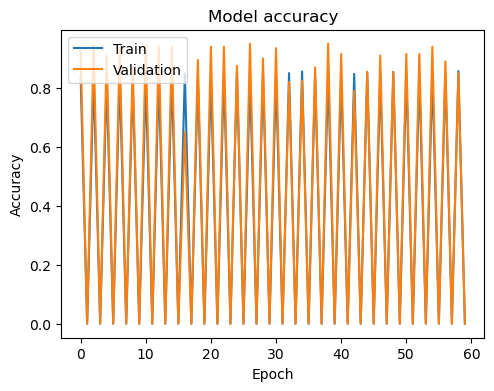

In [23]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

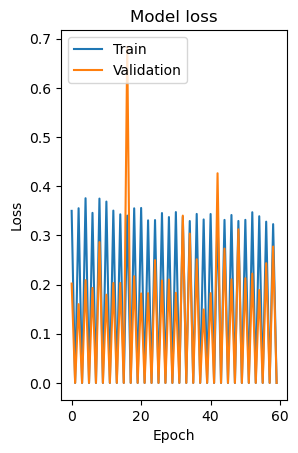

In [24]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f'Overall Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Overall Test Loss: {test_loss * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8352 - loss: 0.2960
Overall Test Accuracy: 85.00%
Overall Test Loss: 29.38%


In [37]:

# Predict the classes on the test set
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes
y_true = test_set.classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Overall Test Accuracy: 85.00%


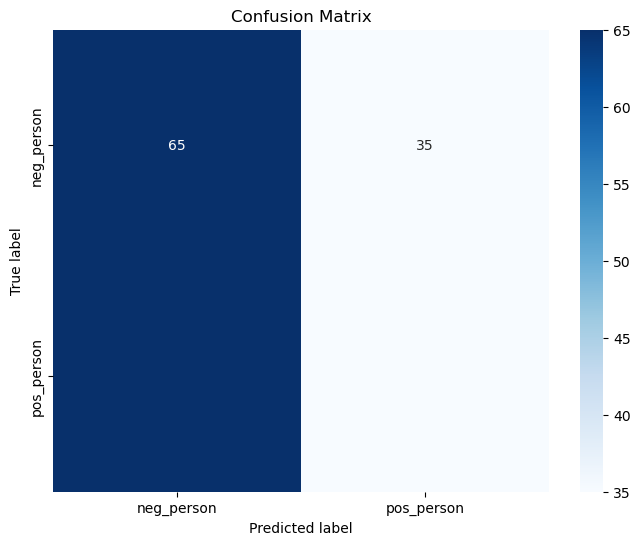

In [36]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()